# 🔥 **Project Overview: Fire Detection using CNN**

## 🛠️ Problem Statement  
Early and accurate detection of fire is crucial for preventing disasters and ensuring public safety. Traditional fire detection methods (e.g., smoke detectors or sensor-based systems) may be limited by environmental conditions, false alarms, or slow detection rates. Leveraging artificial intelligence and deep learning offers a promising solution to automatically identify fire presence from visual data.

## 🎯 Objective  
The goal of this project is to develop a **Convolutional Neural Network (CNN)** based image classification model capable of predicting whether an image contains **fire** or **no fire**. The model will assist in real-time monitoring systems to automatically flag hazardous fire events from camera feeds.

## 📊 Dataset  
We utilize the **Fire Dataset** from [Kaggle (phylake1337/fire-dataset)](https://www.kaggle.com/datasets/phylake1337/fire-dataset), which contains a collection of labeled images categorized into:
- **Fire**: Images depicting flames and fire incidents.
- **No Fire**: Images without any fire presence.

The dataset is organized into training, validation, and testing sets using a structured directory format suitable for deep learning pipelines.

## ✅ Expected Outcome  
By the end of this project, we aim to:
- Build and train a robust CNN classifier that can accurately differentiate between fire and no fire images.
- Achieve high performance on unseen test data (accuracy and other metrics).
- Provide visualizations and insights into model predictions to ensure reliability and interpretability.


## 2️⃣ Setup & Imports

In this section, we import all necessary libraries.


In [36]:
import os
import matplotlib.pyplot as plt
import cv2
from shutil import move
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras import callbacks
import tensorflow as tf
from tensorflow.keras.preprocessing import image

### GPU functionality 

In [18]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## 3️⃣ Data Loading & Directory Structure

We load the dataset and prepare the directory structure suitable for training, validation, and testing.  
The dataset is downloaded from Kaggle and organized into respective folders.

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("phylake1337/fire-dataset")

print("Path to dataset files:", path)

c:\Users\LACHAAL\miniconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Resuming download from 13631488 bytes (392503807 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/phylake1337/fire-dataset?dataset_version_number=1 (13631488/406135295) bytes left.


  4%|▎         | 14.0M/387M [00:07<47:14, 138kB/s]


KeyboardInterrupt: 

In [ ]:
#directory preparation
os.mkdir("Dataset")
os.mkdir("Dataset/train")
os.mkdir("Dataset/test")



In [20]:
#defining paths 
non_fire_path = "fire_dataset/non_fire_images"
test_path="Dataset/test"
train_path="Dataset/train"
fire_path= "fire_dataset/fire_images"

In [ ]:
# preparing categories directories in test and train folder
os.mkdir(os.path.join(test_path,"fire"))
os.mkdir(os.path.join(test_path,"non_fire"))
os.mkdir(os.path.join(train_path,"fire"))
os.mkdir(os.path.join(train_path,"non_fire"))

In [ ]:
# data splitting with 80 % for training and 20% dor validation

labels= os.listdir(fire_path)
n= len (labels)
for label in labels[:int(np.floor(n*0.8))]:
    src= os.path.join(fire_path,label)
    dst= os.path.join(train_path,"fire")
    move(src,dst)


In [ ]:
dst = os.path.join(test_path,"fire")
for label in labels[int(np.floor(n*0.8)):]:
    src= os.path.join(fire_path,label)
    move(src,dst)

In [ ]:
labels = os.listdir(non_fire_path)
n= len(labels)
dst= os.path.join(train_path,"non_fire")
for label in labels[:int(np.floor(n*0.8))]:
    src= os.path.join(non_fire_path,label)
    move(src,dst)
dst= os.path.join(test_path,"non_fire")
for label in labels[int(np.floor(n*0.8)):]:
    src= os.path.join(non_fire_path,label)
    move(src,dst)


False

## 4️⃣ Exploratory Data Analysis (EDA)

We explore the dataset to visualize sample images from both categories.
- Display random sample images from each class


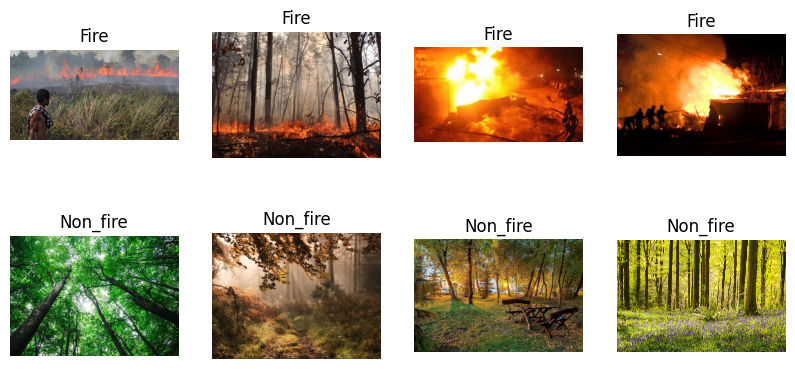

In [35]:
fig= plt.figure(figsize=(10,10))
train_non_fire= os.path.join(train_path,"non_fire")
train_fire=os.path.join(train_path,"fire")
labels= os.listdir(train_fire)
for i in range(4) :
    img = cv2.imread(os.path.join(train_fire,labels[i]))
    img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.subplot(4,4,i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Fire")
labels=os.listdir(train_non_fire)
for i in range(4,8):
    img= cv2.imread(os.path.join(train_non_fire,labels[i]))
    img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.subplot(4,4,i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Non_fire")
plt.show()
    

In [22]:
image.shape

(2955, 4433, 3)

## 5️⃣ Data Preprocessing & Augmentation

We apply data augmentation techniques and normalize images to improve generalization and model robustness.
- Rescale pixel values to [0, 1]
- Apply random transformations (rotation, flip, zoom, etc.)

In [23]:
# Training data augmentation pipeline

train_datagen=ImageDataGenerator(
    rescale=1/255,
    rotation_range= 30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Train data pipeline
train_data= train_datagen.flow_from_directory(train_path,
                                              color_mode="rgb",
                                              target_size=(256,256),
                                              batch_size= 32,
                                              class_mode = 'binary',
                                              shuffle=True)
# Test data pipeline
validation_datagen= ImageDataGenerator(rescale= 1/255)
validation_data= validation_datagen.flow_from_directory(test_path,
                                                        color_mode = "rgb",
                                                        target_size=(256,256),
                                                        class_mode="binary",
                                                        shuffle=True)


Found 799 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [24]:
len(train_data),len(validation_data)

(25, 7)

## 6️⃣ Model Building

We construct a Convolutional Neural Network (CNN) model with layers of:
- Convolution + Pooling + Batch Normalization
- Dropout for regularization
- Dense layers for classification

The architecture is designed to extract meaningful features and make accurate predictions.


In [25]:


model = Sequential()
#first conv layer
model.add(layers.Conv2D(filters=32,kernel_size = (2,2),activation='relu',input_shape = (256,256,3)))
model.add(layers.MaxPool2D())

#second conv layer
model.add(layers.Conv2D(filters=64,kernel_size=(2,2),activation='relu'))
model.add(layers.MaxPool2D())

#3rd concolutional layer
model.add(layers.Conv2D(filters=128,kernel_size=(2,2),activation='relu'))
model.add(layers.MaxPool2D())

#dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))





## 7️⃣ Model Compilation

We compile the model using:
- Optimizer: Adam
- Loss Function: Binary Crossentropy
- Evaluation Metric: Accuracy


In [26]:
# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## ⚙️ Callbacks

We configure callbacks to improve training efficiency and prevent overfitting:

- **ModelCheckpoint**: Saves the model with the best validation loss during training.
- **ReduceLROnPlateau**: Reduces the learning rate when the validation loss plateaus, helping the model converge better.

These callbacks will help optimize performance and ensure the best model is retained.


In [27]:


callbacks_list=[callbacks.ModelCheckpoint(filepath='my_model2.keras',
                                            monitor='val_loss',
                                            save_best_only=True ),
                callbacks.ReduceLROnPlateau(monitor='val_loss',
                                            factor=0.1,
                                            patience=2),]

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 128)      0

## 8️⃣ Model Training

We train the model using the prepared training and validation datasets.  
Callbacks such as EarlyStopping and ModelCheckpoint are used to monitor performance and prevent overfitting.


In [29]:
history =model.fit(train_data,
                             steps_per_epoch=25 ,
                             epochs= 20,
                             validation_data=validation_data,
                             validation_steps= 7,
                             callbacks=callbacks_list)

Epoch 1/20
25/25 [==============================] - 17s 607ms/step - loss: 0.4311 - accuracy: 0.7835 - val_loss: 0.2922 - val_accuracy: 0.8300 - lr: 0.0010
Epoch 2/20
25/25 [==============================] - 14s 550ms/step - loss: 0.1659 - accuracy: 0.9424 - val_loss: 0.1849 - val_accuracy: 0.9250 - lr: 0.0010
Epoch 3/20
25/25 [==============================] - 13s 536ms/step - loss: 0.1222 - accuracy: 0.9499 - val_loss: 0.2551 - val_accuracy: 0.9150 - lr: 0.0010
Epoch 4/20
25/25 [==============================] - 14s 538ms/step - loss: 0.1360 - accuracy: 0.9449 - val_loss: 0.1485 - val_accuracy: 0.9450 - lr: 0.0010
Epoch 5/20
25/25 [==============================] - 14s 533ms/step - loss: 0.0886 - accuracy: 0.9650 - val_loss: 0.2563 - val_accuracy: 0.9150 - lr: 0.0010
Epoch 6/20
25/25 [==============================] - 14s 528ms/step - loss: 0.0751 - accuracy: 0.9737 - val_loss: 0.1359 - val_accuracy: 0.9450 - lr: 0.0010
Epoch 7/20
25/25 [==============================] - 13s 542ms/st

## 9️⃣ Model Evaluation

We evaluate the trained model on the test dataset using metrics such as:
- Test accuracy
- Confusion matrix
- Classification report


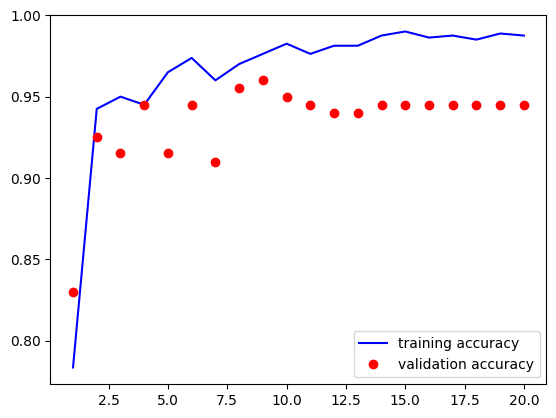

In [32]:
# training and test accuracy evolution through epochs
acc_train = history.history["accuracy"]
loss_train= history.history["loss"]
acc_val= history.history["val_accuracy"]
loss_val=history.history["val_loss"]
epochs = range(1,len(acc_train)+1)
plt.plot(epochs,acc_train,"b-",label="training accuracy")
plt.plot(epochs,acc_val,"ro",label="validation accuracy")
plt.legend()
plt.show()

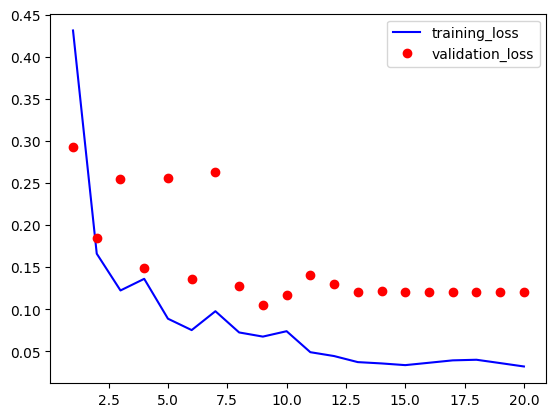

In [33]:
# loss
plt.plot(epochs,loss_train,"b-",label="training_loss")
plt.plot(epochs,loss_val,"ro",label="validation_loss")
plt.legend()
plt.show()

## 1️⃣0️⃣ Predictions & Visualization

We visualize model predictions on sample test images to qualitatively assess performance.


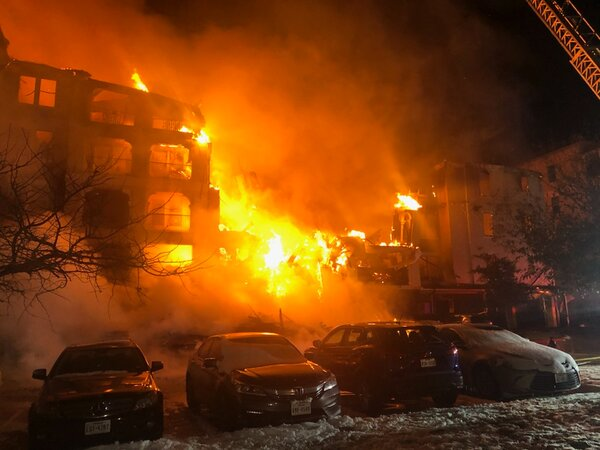

In [37]:
img = image.load_img('predict.jpg')
img

In [38]:
# image processing
img = image.img_to_array(img)/255
img = tf.image.resize(img,(256,256))
img = tf.expand_dims(img,axis=0)

print("Image Shape",img.shape)

Image Shape (1, 256, 256, 3)


In [39]:
# loading model for prediction
labels= ['FIRE','NON_FIRE']
model = models.load_model("my_model.keras")


In [40]:
prediction = int(tf.round(model.predict(x=img)).numpy()[0][0])
print("The predicted value is: ",prediction,"and the predicted label is:",labels[prediction])

1/1 [==============================] - 0s 66ms/step
The predicted value is:  0 and the predicted label is: FIRE


## 🛠️ Environment & References

- Python version:3.9
- TensorFlow version: 2.10.1
- GPU configuration : cudnn and CUDAtoolkit
- Dataset: [Kaggle Fire Dataset (phylake1337/fire-dataset)](https://www.kaggle.com/datasets/phylake1337/fire-dataset)
- Libraries used: TensorFlow, Keras, NumPy, Matplotlib, opencv

References:
- Deep learning with python (Book by François Chollet)
- Fire detection notebooks kaggle
